(pandas1)=
# Tables (`pandas`)

In [43]:
!echo Last updated: `date +"%Y-%m-%d %H:%M:%S"`

Last updated: 2022-06-25 17:09:49


In [44]:
import pandas as pd
import matplotlib.pyplot as plt
pd.options.display.max_rows = 10
pd.options.display.max_columns = 10
pd.options.display.max_colwidth = 35
plt.rcParams["figure.figsize"] = (6, 6)

*****

## Introduction

Tables are a fundamental data structure, common to many software interfaces, such as spreadsheet programs, relational databases, statistical software, etc. In general, a table is a two-dimensional structure where:

* Columns represent *variables*
* Rows represent *observations*

Accordingly, the data in a given table column is usually of the same data type. For example, a text column may be used to store product names, and a numeric column may be used for storing product prices. Conversely, the data in a given row may comprise mixed types, such as the product name (text) and the price (numeric) of a particular product.

In this chapter we introduce methods for working with *tables* in Python, through a popular third-party package named `pandas`, introducing two table-related data structures, `Series` and `DataFrame`. As we will see, the latter data structures are closely related to `numpy`, which was covered in the previous chapter (see {ref}`numpy`), since the data in each table column is actually stored as an "extended" one-dimensional `numpy` array. We are going to cover standard table-related operations, such as:

* Creating tables (see {ref}`pandas-creating-from-scratch` and {ref}`pandas-reading-from-file`)
* Examining table properties (see {ref}`dataframe-properties`)
* Modifying tables (see {ref}`pandas-renaming-columns`, {ref}`modifying-index`, {ref}`pandas-sorting`, {ref}`pandas-operators`, and {ref}`pandas-creating-new-columns`)
* Subsetting tables (see {ref}`subsetting-series`, {ref}`subsetting-dataframes`, and {ref}`dataframe-filtering`)
* {ref}`pandas-missing-data`
* Conversion to simpler data structures (see {ref}`dataframe-to-array` and {ref}`pandas-to-list`)
* Plotting table data (see {ref}`pandas-plotting`)
* Exporting a table to file (see {ref}`pandas-writing`)

In the next chapter, we are going to discuss more advanced operations with tables, such as table aggregation and table joins (see {ref}`pandas2`). Later on, we are going to learn about the `geopandas` package for working with vector layers, which is an extension of `pandas` (see {ref}`geopandas1` and {ref}`geopandas2`).

## What is `pandas`?

`pandas` is a popular Python package which provides a flexible set of tools for working with tabular data. Since tables are fundamental in data analysis, `pandas` is one of the most important packages for data analysis in Python. Moreover, as we will see later on in the book (see {ref}`geopandas1`), a vector layers is represented by an "extended" table—a table that has a "geometry" column. Accordingly, the package for working with vector later, named `geopandas`, is an extension of `pandas`.

The `pandas` package defines two fundamental data structures:

* `Series`—A one-dimensional structure, representing a table *column*
* `DataFrame`—A two-dimensional structure, represent a *table*

As we will see shortly, `pandas` is essentially an extension of `numpy`. A `pandas` table (a data structure named `DataFrame`) is a collection of `Series` representing the table columns, whereas `Series` are actually nothing more than labelled `numpy` arrays. To repeat, these two data structures therefore form a hierarchy: each column in a `DataFrame` is a `Series`.

```{note}
For those familiar with the R programming language, the term `DataFrame` will sound familiar, resembling R's own data structure for representing tables (the `data.frame`). Indeed, `pandas` borrowed many ideas from the R language. A pairwise comparison of `pandas` vs. R functionality can be found in the `pandas` documentation: <https://pandas.pydata.org/docs/getting_started/comparison/comparison_with_r.html>
```

(pandas-creating-from-scratch)=
## Creating from scratch

(creating-series)=
### Creating a `Series`

To understand how a `DataFrame` is structured, we will experiment with creating one from scratch. First we need to load the `pandas` package, as well as `numpy` which we use in some of the examples:

In [45]:
import numpy as np
import pandas as pd

A `Series` can be created, from a `list`, or from an `ndarray`, using `pd.Series`. For example, the following expression creates a `Series` from a `list` containing three strings, the names of three railway stations in southern Israel:

In [46]:
name = pd.Series(['Beer-Sheva Center', 'Beer-Sheva University', 'Dimona'])
name

0        Beer-Sheva Center
1    Beer-Sheva University
2                   Dimona
dtype: object

```{note}
In `pandas`, strings are always stored as `'object'` arrays (`Series`), unlike `numpy` which has specialized native data types for strings.
```

The following expression creates another `Series`, named `lines`, containing the number of railway lines going through the latter stations. This time, we create the `Series` from an `ndarray`:

In [47]:
lines = pd.Series(np.array([4, 5, 1]))
lines

0    4
1    5
2    1
dtype: int64

A `Series` object is essentially a `numpy` array, combined with *indices*. Here is how we can access each of these components, separately:

In [48]:
lines.to_numpy()  ## Series values, as 'ndarray'

array([4, 5, 1])

In [49]:
lines.index       ## Series index

RangeIndex(start=0, stop=3, step=1)

As you can see, `Series` *values* comprise a `numpy` array, which we are already familiar with. `Series` *indices*, however, comprise a special type of object used for indexing in `pandas`:

In [50]:
type(name.index)

pandas.core.indexes.range.RangeIndex

By default, the index is just a sequence of consecutive integers (such as in `names` and `lines`). When necessary, we can define any other sequence of values as a `Series` index (see {ref}`modifying-index`), then use it to access specific values (see {ref}`subsetting-series`).

Index objects are similar to arrays in many ways. For example, they have `.shape` and `.dtype` attributes, just like arrays do:

In [51]:
lines.index.shape

(3,)

In [52]:
lines.index.dtype

dtype('int64')

(creating-dataframe)=
### Creating a `DataFrame`

While a `Series` can be thought of as an extended one-dimensional array, a `DataFrame` can be thought of as a collection of `Series` comprising table columns. Unlike a two-dimensional `numpy` array, a `DataFrame` can be composed of different types of values (among the columns). Consequently: 

* a `DataFrame` *column* (i.e., a `Series`) contains values of the *same* type, usually representing a particular variable
* a `DataFrame` *row* may contain values of *different* types, usually representing a specific observation

Since a `DataFrame` is two-dimensional, it has two sets of idices, row and column indices, just like a two-dimensional array. It is important to note that all `Series` that comprise the columns of a `DataFrame` share the same index.

A `DataFrame` can be created from scratch, using the `pd.DataFrame` function. To do that, let us create four more `Series` which are going to comprise the `DataFrame` columns. Altogether, the `DataFrame` is going to represent various properties of three railway stations:

In [53]:
city = pd.Series(['Beer-Sheva', 'Beer-Sheva', 'Dimona'])
piano = pd.Series([False, True, False])
lon = pd.Series([34.798443, 34.812831, 35.011635])
lat = pd.Series([31.243288, 31.260284, 31.068616])

Here is a printout of the four `Series` we just created:

In [54]:
city

0    Beer-Sheva
1    Beer-Sheva
2        Dimona
dtype: object

In [55]:
piano

0    False
1     True
2    False
dtype: bool

In [56]:
lon

0    34.798443
1    34.812831
2    35.011635
dtype: float64

In [57]:
lat

0    31.243288
1    31.260284
2    31.068616
dtype: float64

Now, the six different `Series` can be combined into a `DataFrame` by passing them, as a `dict` (see {ref}`dict`), to the `pd.DataFrame` function. That way, the `dict` names will form the `DataFrame` column names, while the corresponding `Series` will form the column contents:

In [58]:
d = {'name': name, 'city': city, 'lines': lines, 'piano': piano, 'lon': lon, 'lat': lat}
stations = pd.DataFrame(d)
stations

name        city  lines  piano        lon        lat
0      Beer-Sheva Center  Beer-Sheva      4  False  34.798443  31.243288
1  Beer-Sheva University  Beer-Sheva      5   True  34.812831  31.260284
2                 Dimona      Dimona      1  False  35.011635  31.068616

```{note}
Note that there are other methods to create a `DataFrame`, passing different types of input to the `pd.DataFrame` function. For example, another useful method of creating a `DataFrame` by passing a two-dimensional array to `pd.DataFrame`.
```

`DataFrame` row indices are analogous to `Series` indices, and accessed exactly the same way:

In [59]:
stations.index

RangeIndex(start=0, stop=3, step=1)

Additionally, a `DataFrame` has *column* indices, which function as column names and can be accessed through the `.columns` property:

In [60]:
stations.columns

Index(['name', 'city', 'lines', 'piano', 'lon', 'lat'], dtype='object')

(pandas-reading-from-file)=
## Reading from file

In practice, we rarely need to create a `DataFrame` from scratch. More often, we read a table in an existing file containing tabular data, such as a CSV file.

The `pd.read_csv` function is used to read a CSV file into a `DataFrame` in our Python environment. For example, the following expression reads the CSV file named `ZonAnn.Ts+dSST.csv`, which contains global temperature data from [GISS](https://data.giss.nasa.gov/gistemp/). The values are anomalies, i.e. deviations from the corresponding 1951-1980 mean, for the period 1880-2021 (`"Year"`), both globally (`"Glob"`) and for specific latitudes (`"NHem"`=Nothern Hemishpere, `"24N-90N"` latitudes 24-90, etc.):

In [61]:
dat = pd.read_csv('data/ZonAnn.Ts+dSST.csv')
dat

Year  Glob  NHem  SHem  24N-90N  ...  EQU-24N  24S-EQU  44S-24S  64S-44S  \
0    1880 -0.16 -0.29 -0.04    -0.37  ...    -0.15    -0.09    -0.03     0.05   
1    1881 -0.08 -0.17  0.01    -0.34  ...     0.10     0.12    -0.05    -0.07   
2    1882 -0.11 -0.21  0.00    -0.31  ...    -0.05    -0.04     0.02     0.04   
3    1883 -0.17 -0.28 -0.06    -0.35  ...    -0.17    -0.14    -0.03     0.07   
4    1884 -0.28 -0.43 -0.14    -0.61  ...    -0.13    -0.15    -0.19    -0.02   
..    ...   ...   ...   ...      ...  ...      ...      ...      ...      ...   
137  2017  0.92  1.18  0.67     1.40  ...     0.87     0.77     0.76     0.35   
138  2018  0.85  1.04  0.66     1.25  ...     0.73     0.62     0.79     0.37   
139  2019  0.98  1.22  0.75     1.43  ...     0.91     0.89     0.74     0.39   
140  2020  1.02  1.36  0.68     1.68  ...     0.89     0.84     0.58     0.39   
141  2021  0.85  1.15  0.55     1.43  ...     0.73     0.59     0.71     0.32   

     90S-64S  
0       0.65  
1       0.57  
2       0.60  
3       0.48  
4       0.63  
..       ...  
137     0.55  
138     0.96  
139     0.83  
140     0.91  
141     0.33  

[142 rows x 15 columns]

```{note}
`pandas` has several functions named `pd.read_*` to read formats other than CSV, such as `pd.read_json`, `pd.read_excel`, `pd.read_spss`, `pd.read_stata`, and `pd.read_sql`. Similarly, there are several functions to write `DataFrame` objects to various output formats. See the [IO tools](https://pandas.pydata.org/docs/user_guide/io.html) section in the `pandas` user guide for an overview of the input/output capabilities.
```

Note that rows and columns are *labelled* using indices, as shown above. In this case: 

* Rows are labelled with consecutive integers
* Columns are labelled with column names, which are imported from the first line in CSV file

(dataframe-properties)=
## `DataFrame` properties

### Overview

One of the first things we may want to do with a `DataFrame` imported from a file is to examine its properties, as shown in the next few sections: 

* {ref}`dataframe-dimensions`
* {ref}`dataframe-column-names`
* {ref}`dataframe-column-types`

(dataframe-dimensions)=
### `DataFrame` dimensions

`DataFrame` dimensions are accessible through the `.shape` property, just like in a `numpy` array (see {ref}`array-dimensions`). For example, the `dat` table (with the temperature data) has 142 rows and 15 columns:

In [62]:
dat.shape

(142, 15)

(dataframe-column-names)=
### `DataFrame` column names

The `DataFrame` column names can be obtained through the `.columns` property. Recall that this is a special data structure representing `pandas` indices (see {ref}`pandas-creating-from-scratch`):

In [63]:
dat.columns

Index(['Year', 'Glob', 'NHem', 'SHem', '24N-90N', '24S-24N', '90S-24S',
       '64N-90N', '44N-64N', '24N-44N', 'EQU-24N', '24S-EQU', '44S-24S',
       '64S-44S', '90S-64S'],
      dtype='object')

```{admonition} Exercise 05-a
:class: important
* From your experience with Python so far, can you guess how can the columns names be transformed to a plain `list`? (You can also try searching for the answer online.)
```

(dataframe-column-types)=
### `DataFrame` column types

The data types (see {ref}`numpy-data-types`) of the columns are contained in the `dtypes` property:

In [64]:
dat.dtypes

Year         int64
Glob       float64
NHem       float64
SHem       float64
24N-90N    float64
            ...   
EQU-24N    float64
24S-EQU    float64
44S-24S    float64
64S-44S    float64
90S-64S    float64
Length: 15, dtype: object

Note that this is a `Series` (of `dtype` objects). This means we can get a specific value by index using the ordinary `Series` subsetting methods which we learn about later on (see {ref}`subsetting-series`). For example, the `"Year"` column was imported into a `Series` of type `int64`:

In [65]:
dat.dtypes.loc['Year']

dtype('int64')

while the `"Glob"` column (global temperature anomaly) was imported into a `float64` column:

In [66]:
dat.dtypes.loc['Glob']

dtype('float64')

The basic `pandas` data types are in agreement with `numpy` data types (see {ref}`numpy-data-types`). For example, the `dat` table contains `int64` and `float64` data types. However, `pandas` and its extensions (such as `geopandas`, see {ref}`what-is-geopandas`) also extend the `numpy` functionality with new data types (such as `GeometryDtype`, see {ref}`geoseries-geometry-column`).

(pandas-renaming-columns)=
## Renaming columns

Sometimes it is necessary to rename `DataFrame` columns. For example, we may wish to use shorter names which are easier to type, or make the columns match another table we are working with. Columns can be renamed using the `.rename` method, which accepts a `columns` argument of the form `{'old_name':'new_name',...}`. For example, here is how we can replace the `'Year'` column name with lowercase `'year'`:

In [67]:
dat.rename(columns={'Year': 'year'})

year  Glob  NHem  SHem  24N-90N  ...  EQU-24N  24S-EQU  44S-24S  64S-44S  \
0    1880 -0.16 -0.29 -0.04    -0.37  ...    -0.15    -0.09    -0.03     0.05   
1    1881 -0.08 -0.17  0.01    -0.34  ...     0.10     0.12    -0.05    -0.07   
2    1882 -0.11 -0.21  0.00    -0.31  ...    -0.05    -0.04     0.02     0.04   
3    1883 -0.17 -0.28 -0.06    -0.35  ...    -0.17    -0.14    -0.03     0.07   
4    1884 -0.28 -0.43 -0.14    -0.61  ...    -0.13    -0.15    -0.19    -0.02   
..    ...   ...   ...   ...      ...  ...      ...      ...      ...      ...   
137  2017  0.92  1.18  0.67     1.40  ...     0.87     0.77     0.76     0.35   
138  2018  0.85  1.04  0.66     1.25  ...     0.73     0.62     0.79     0.37   
139  2019  0.98  1.22  0.75     1.43  ...     0.91     0.89     0.74     0.39   
140  2020  1.02  1.36  0.68     1.68  ...     0.89     0.84     0.58     0.39   
141  2021  0.85  1.15  0.55     1.43  ...     0.73     0.59     0.71     0.32   

     90S-64S  
0       0.65  
1       0.57  
2       0.60  
3       0.48  
4       0.63  
..       ...  
137     0.55  
138     0.96  
139     0.83  
140     0.91  
141     0.33  

[142 rows x 15 columns]

```{note}
Another option to rename columns is to assign a `list` of strings of the same length as the number of columns to the `.columns` attribute (see <https://stackoverflow.com/questions/11346283/renaming-column-names-in-pandas#answer-11346337>).
```

(pandas-subsetting-overview)=
## Subsetting in `pandas`

There are numerous methods of subsetting `Series` and `DataFrame`s in `pandas`. For example, `Series` values can be subsetted using the `[` operator. However, this can be confusing since both using numeric indices and the index values are permitted, and it can be unclear which method is actually employed. 

In agreement with the Python philosophy, where *explicit* is better than implicit, the [recommended](https://stackoverflow.com/questions/38886080/python-pandas-series-why-use-loc) subsetting methods are using `.loc` and `.iloc`, which are discussed in the following sub-sections. The principal difference between `.loc` and `.iloc` is:

* `.loc` uses `pandas` indices, while 
* `.iloc` uses (implicit) `numpy`-style numeric indices. 

In this book, we are going to use `.iloc` and `.loc` methods when subsetting `Series` (this section) and `DataFrame` (see {ref}`subsetting-dataframes`) objects. Nevertheless, for shorter syntax, in three exceptions we are going to use the `[` shortcut as follows: 

* Selecting `DataFrame` columns using the `[` operator, as in: 
    * `dat['Year']` instead of `dat.loc[:,'Year']` (see {ref}`dataframe-selecting-columns`)
    * `dat[['Year']]` instead of `dat.loc[:,['Year']]` (see {ref}`dataframe-selecting-columns`)
* Filtering `DataFrame` rows using the `[` operator, as in:
    * `dat[dat['Year']>2017]` instead of `dat.loc[dat['Year']>2017]` (see {ref}`dataframe-filtering`)

(subsetting-series)=
## Subsetting `Series`

As mentioned above, the recommended way to subset `Series` is using the specialized methods named `.loc` and `.iloc`:

* `.loc`—For subsetting using the `Series` index
* `.iloc`—For subsetting using the (implicit) `numpy` index

What follows after the method are the indices, inside square brackets (`[`), whereas the indices can be one of:

* An individual value, such as `.loc['a']` or `.iloc[0]`
* A slice, such as `.loc['a':'b']` or `.iloc[1:2]`
* A `list`, such as `.loc[['a','c']]` or `.iloc[[0,2]]`

For the next few examples, let us create a `Series` object named `s`, with:

* values `11`, `12`, `13`, `14`, and 
* indices `'a'`, `'b'`, `'c'`, `'d'`, 
 
using the `index` parameter of `pd.Series`:

In [68]:
s = pd.Series([11, 12, 13, 14], index=['a', 'b', 'c', 'd'])
s

a    11
b    12
c    13
d    14
dtype: int64

Here is how we can use `.loc` to select values using the three above-mentioned types of indices:

In [69]:
s.loc['a']         ## Individual index

11

In [70]:
s.loc['b':'c']     ## Slice

b    12
c    13
dtype: int64

In [71]:
s.loc[['a', 'c']]  ## 'list' of indices

a    11
c    13
dtype: int64

And here is how we can use `.iloc` to select values using `numpy`-style numeric indices:

In [72]:
s.iloc[0]       ## Individual index

11

In [73]:
s.iloc[1:2]     ## Slice

b    12
dtype: int64

In [74]:
s.iloc[[0, 2]]  ## 'list' of indices

a    11
c    13
dtype: int64

In the above examples, note how using an individual index returns a standalone value, while using a slice, or a list of indices, return a `Series`, even if the list or the slice contains just one element:

In [75]:
s.iloc[[0]]

a    11
dtype: int64

Also note that a slice using indices (such as `s.loc["a":"b"]`) is *inclusive*, while a slice using implicit indices (such as `.iloc[0:1]`) excludes the last index similarly to `list` and `numpy` behavior.

(subsetting-dataframes)=
## Subsetting `DataFrame`s

(dataframe-selecting-columns)=
### Selecting `DataFrame` columns

A `DataFrame` is a two-dimensional object, unlike a `Series` which is one-dimensional. Accordingly, the `.loc` and `iloc` methods of a `DataFrame` accept two indices, separated by a comma: 

* The *first* index refers to rows
* The *second* index refers to columns

When we want to select *all* rows or columns, we place `:` in the respective index, similarly to `numpy` array subsetting (see {ref}`subsetting-arrays`). Using an individual index returns a `Series`, while using a slice or a `list` of indices—even if length `1`—returns a `DataFrame`.

For example, this is how we can use `.loc` to extract one `DataFrame` column as a `Series`:

In [76]:
dat.loc[:, 'Glob']

0     -0.16
1     -0.08
2     -0.11
3     -0.17
4     -0.28
       ... 
137    0.92
138    0.85
139    0.98
140    1.02
141    0.85
Name: Glob, Length: 142, dtype: float64

and here is how we can extract a single column as a `DataFrame`:

In [77]:
dat.loc[:, ['Glob']]

Glob
0   -0.16
1   -0.08
2   -0.11
3   -0.17
4   -0.28
..    ...
137  0.92
138  0.85
139  0.98
140  1.02
141  0.85

[142 rows x 1 columns]

As mentioned above (see {ref}`pandas-subsetting-overview`), we can also use the shortcut `[` operator to subset columns(s):

In [78]:
dat['Glob']  ## Shortcut for `dat.loc[:, 'Glob']`

0     -0.16
1     -0.08
2     -0.11
3     -0.17
4     -0.28
       ... 
137    0.92
138    0.85
139    0.98
140    1.02
141    0.85
Name: Glob, Length: 142, dtype: float64

In [79]:
dat[['Glob']]  ## Shortcut for `dat.loc[:, ['Glob']]`

Glob
0   -0.16
1   -0.08
2   -0.11
3   -0.17
4   -0.28
..    ...
137  0.92
138  0.85
139  0.98
140  1.02
141  0.85

[142 rows x 1 columns]

```{note}
Dot notation, as in `dat.Glob` can also be used to select individual columns of a `DataFrame`. However, this is not recommended, because it does not work (1) with non-string column names, and (2) with column names that are the same as `DataFrame` methods, such as `.pop`.
```

We can pass a `list` of column names to select more then one column. For example:

In [80]:
dat[['Year', 'Glob', 'NHem', 'SHem']]

Year  Glob  NHem  SHem
0    1880 -0.16 -0.29 -0.04
1    1881 -0.08 -0.17  0.01
2    1882 -0.11 -0.21  0.00
3    1883 -0.17 -0.28 -0.06
4    1884 -0.28 -0.43 -0.14
..    ...   ...   ...   ...
137  2017  0.92  1.18  0.67
138  2018  0.85  1.04  0.66
139  2019  0.98  1.22  0.75
140  2020  1.02  1.36  0.68
141  2021  0.85  1.15  0.55

[142 rows x 4 columns]

To select all columns *except* for the specified ones, we can use the `.drop` method combined with `axis=1`:

In [81]:
dat.drop(['Year', 'Glob', 'NHem', 'SHem', '24N-90N', '24S-24N', '90S-24S'], axis=1)

64N-90N  44N-64N  24N-44N  EQU-24N  24S-EQU  44S-24S  64S-44S  90S-64S
0      -0.81    -0.49    -0.27    -0.15    -0.09    -0.03     0.05     0.65
1      -0.92    -0.45    -0.19     0.10     0.12    -0.05    -0.07     0.57
2      -1.42    -0.28    -0.15    -0.05    -0.04     0.02     0.04     0.60
3      -0.19    -0.56    -0.27    -0.17    -0.14    -0.03     0.07     0.48
4      -1.31    -0.64    -0.47    -0.13    -0.15    -0.19    -0.02     0.63
..       ...      ...      ...      ...      ...      ...      ...      ...
137     2.54     1.38     1.05     0.87     0.77     0.76     0.35     0.55
138     2.15     1.09     1.06     0.73     0.62     0.79     0.37     0.96
139     2.73     1.44     1.01     0.91     0.89     0.74     0.39     0.83
140     2.92     1.82     1.20     0.89     0.84     0.58     0.39     0.91
141     2.04     1.37     1.28     0.73     0.59     0.71     0.32     0.33

[142 rows x 8 columns]

Another useful technique is to use `.loc` combined with *slices* of column names. For example, we can select all columns between two specified ones:

In [82]:
dat.loc[:, 'Year':'SHem']

Year  Glob  NHem  SHem
0    1880 -0.16 -0.29 -0.04
1    1881 -0.08 -0.17  0.01
2    1882 -0.11 -0.21  0.00
3    1883 -0.17 -0.28 -0.06
4    1884 -0.28 -0.43 -0.14
..    ...   ...   ...   ...
137  2017  0.92  1.18  0.67
138  2018  0.85  1.04  0.66
139  2019  0.98  1.22  0.75
140  2020  1.02  1.36  0.68
141  2021  0.85  1.15  0.55

[142 rows x 4 columns]

or all columns *before* a specified one:

In [83]:
dat.loc[:, :'SHem']

Year  Glob  NHem  SHem
0    1880 -0.16 -0.29 -0.04
1    1881 -0.08 -0.17  0.01
2    1882 -0.11 -0.21  0.00
3    1883 -0.17 -0.28 -0.06
4    1884 -0.28 -0.43 -0.14
..    ...   ...   ...   ...
137  2017  0.92  1.18  0.67
138  2018  0.85  1.04  0.66
139  2019  0.98  1.22  0.75
140  2020  1.02  1.36  0.68
141  2021  0.85  1.15  0.55

[142 rows x 4 columns]

or all columns *after* a specified one:

In [84]:
dat.loc[:, 'SHem':]

SHem  24N-90N  24S-24N  90S-24S  64N-90N  ...  EQU-24N  24S-EQU  44S-24S  \
0   -0.04    -0.37    -0.12    -0.01    -0.81  ...    -0.15    -0.09    -0.03   
1    0.01    -0.34     0.11    -0.07    -0.92  ...     0.10     0.12    -0.05   
2    0.00    -0.31    -0.04     0.01    -1.42  ...    -0.05    -0.04     0.02   
3   -0.06    -0.35    -0.16    -0.01    -0.19  ...    -0.17    -0.14    -0.03   
4   -0.14    -0.61    -0.14    -0.14    -1.31  ...    -0.13    -0.15    -0.19   
..    ...      ...      ...      ...      ...  ...      ...      ...      ...   
137  0.67     1.40     0.82     0.59     2.54  ...     0.87     0.77     0.76   
138  0.66     1.25     0.68     0.68     2.15  ...     0.73     0.62     0.79   
139  0.75     1.43     0.90     0.64     2.73  ...     0.91     0.89     0.74   
140  0.68     1.68     0.87     0.57     2.92  ...     0.89     0.84     0.58   
141  0.55     1.43     0.66     0.53     2.04  ...     0.73     0.59     0.71   

     64S-44S  90S-64S  
0       0.05     0.65  
1      -0.07     0.57  
2       0.04     0.60  
3       0.07     0.48  
4      -0.02     0.63  
..       ...      ...  
137     0.35     0.55  
138     0.37     0.96  
139     0.39     0.83  
140     0.39     0.91  
141     0.32     0.33  

[142 rows x 12 columns]

Again, note that in the last examples, the subset is *inclusive*, i.e., includes both the start and end columns.

```{admonition} Exercise 05-c
:class: important
* How can we select all columns after the specified one *excluding* itself?
```

(dataframe-selecting-rows)=
### Selecting `DataFrame` rows

Rows can be selected using `.loc` or `.iloc`, similarly to the way we use those methods to select columns. The difference is that we specify the first index, instead of the second. For example:

In [85]:
dat.iloc[[0], :]     ## 1st row

Year  Glob  NHem  SHem  24N-90N  ...  EQU-24N  24S-EQU  44S-24S  64S-44S  \
0  1880 -0.16 -0.29 -0.04    -0.37  ...    -0.15    -0.09    -0.03     0.05   

   90S-64S  
0     0.65  

[1 rows x 15 columns]

In [86]:
dat.iloc[0:3, :]     ## 1st row (inclusive) to 4th row (exclusive)

Year  Glob  NHem  SHem  24N-90N  ...  EQU-24N  24S-EQU  44S-24S  64S-44S  \
0  1880 -0.16 -0.29 -0.04    -0.37  ...    -0.15    -0.09    -0.03     0.05   
1  1881 -0.08 -0.17  0.01    -0.34  ...     0.10     0.12    -0.05    -0.07   
2  1882 -0.11 -0.21  0.00    -0.31  ...    -0.05    -0.04     0.02     0.04   

   90S-64S  
0     0.65  
1     0.57  
2     0.60  

[3 rows x 15 columns]

In [87]:
dat.iloc[[0, 2], :]  ## 1st and 3rd rows

Year  Glob  NHem  SHem  24N-90N  ...  EQU-24N  24S-EQU  44S-24S  64S-44S  \
0  1880 -0.16 -0.29 -0.04    -0.37  ...    -0.15    -0.09    -0.03     0.05   
2  1882 -0.11 -0.21  0.00    -0.31  ...    -0.05    -0.04     0.02     0.04   

   90S-64S  
0     0.65  
2     0.60  

[2 rows x 15 columns]

```{admonition} Exercise 05-b
:class: important
* Create a subset of `dat` with the 1<sup>st</sup>, 3<sup>rd</sup>, and 5<sup>th</sup> rows.
```

### Selecting rows and columns

Both `DataFrame` dimensions can be subsetted at once, by passing two indices to `.loc` or to `.iloc`. For example, here we select a subset of `dat` with the first four rows and the first four columns (i.e., the top-left "corner" of the table), using `.iloc`:

In [88]:
dat.iloc[0:4, 0:4]

Year  Glob  NHem  SHem
0  1880 -0.16 -0.29 -0.04
1  1881 -0.08 -0.17  0.01
2  1882 -0.11 -0.21  0.00
3  1883 -0.17 -0.28 -0.06

The same can be acheived using separate steps, for example using `.loc` to select columns, and then `.iloc` to select rows:

In [89]:
dat.loc[:, 'Year':'SHem'].iloc[0:4, :]

Year  Glob  NHem  SHem
0  1880 -0.16 -0.29 -0.04
1  1881 -0.08 -0.17  0.01
2  1882 -0.11 -0.21  0.00
3  1883 -0.17 -0.28 -0.06

### Selecting `DataFrame` values

Using the above-mentioned methods, we can access individual values from a `DataFrame` in several ways. The clearest syntax is probably splitting the operation into two parts: first selecting the *column*, then selecting the *index* within the column. For example, here is how we can get the first value in the `"Year"` column of `dat`:

In [90]:
dat['Year'].iloc[0]

1880

```{admonition} Exercise 05-d
:class: important
* How can we get the *last* value in the `'Year'` column of `dat`, without explicitly typing the value `141`?
```

(dataframe-to-array)=
## Convertsion to `ndarray`

A `Series` or a `DataFrame` is accessible as an `ndarray`, through the `.to_numpy` method. For example: 

In [91]:
dat['Year'].iloc[0:3].to_numpy()  ## 'Series' to array

array([1880, 1881, 1882])

In [92]:
dat.iloc[0:3, 1:3].to_numpy()     ## 'DataFrame' to array

array([[-0.16, -0.29],
       [-0.08, -0.17],
       [-0.11, -0.21]])

Note that a `Series` is translated to a *one*-dimensional array, while a `DataFrame` is translated to a *two*-dimensional array.

(pandas-to-list)=
## Conversion to `list`

(pandas-series-to-list)=
### `Series` to `list`

Sometimes, we may need to use basic Python methods to work with data contained in a `Series` or in a `DataFrame`. For that purpose, the `Series` or the `DataFrame` can be converted to a `list`.

A `Series` can be converted to a `list` by directly applying the `.to_list` method, which is analogous to the `.tolist` method of `ndarray` (see {ref}`array-to-list`). For example, let us take a small `Series` of length 5:

In [93]:
s = dat['Glob'].iloc[0:5]
s

0   -0.16
1   -0.08
2   -0.11
3   -0.17
4   -0.28
Name: Glob, dtype: float64

Here is how the `Series` can be converted to a `list`, using the `.to_list` method:

In [94]:
s.to_list()

[-0.16, -0.08, -0.11, -0.17, -0.28]

### `DataFrame` to `list`

A `DataFrame` can also be converted to a `list`, in which case the list will be nested, with each *column* represented by an internal `list`. Let us take a small `DataFrame` with five rows and three columns as an example:

In [95]:
dat1 = dat[['Year', 'NHem', 'SHem']].iloc[0:5, :]
dat1

Year  NHem  SHem
0  1880 -0.29 -0.04
1  1881 -0.17  0.01
2  1882 -0.21  0.00
3  1883 -0.28 -0.06
4  1884 -0.43 -0.14

To convert the `DataFrame` to a `list`, we cannot use the `.to_list` method directly. Instead, we need to go through the array representation using the `.to_numpy` method (see {ref}`dataframe-to-array`):

In [96]:
dat1.to_numpy()

array([[ 1.880e+03, -2.900e-01, -4.000e-02],
       [ 1.881e+03, -1.700e-01,  1.000e-02],
       [ 1.882e+03, -2.100e-01,  0.000e+00],
       [ 1.883e+03, -2.800e-01, -6.000e-02],
       [ 1.884e+03, -4.300e-01, -1.400e-01]])

Then, we can use the `numpy`'s `.tolist` method (see {ref}`array-to-list`), to go from `ndarray` to `list`:

In [97]:
dat1.to_numpy().tolist()

[[1880.0, -0.29, -0.04],
 [1881.0, -0.17, 0.01],
 [1882.0, -0.21, 0.0],
 [1883.0, -0.28, -0.06],
 [1884.0, -0.43, -0.14]]

(modifying-index)=
## Modifying the index

### Overivew

In the above examples, the `Series` and `DataFrame` we created got the default, consecutive integer, index. As we will see, the index plays an important role in many operations in `pandas`. Therefore, often we would like to set a more meaningful, custom index. For example, it usually makes sense to set the index of a table representing a time series (such as `dat`) to the time points (such as `"Year"` values). Many `pandas` operations then utilize the index. For example, when plotting the data, the x-axis will show the time labels (see {ref}`pandas-line-plots`).

To set a new index, we:

* Assign to the `.index` property of a `Series` (see {ref}`setting-series-index`)
* Use the `.set_index` method of a `DataFrame` (see {ref}`setting-dataframe-index`)

To reset the index, i.e., get back to the default consecutive integer index, we use the `.reset_index` method (see {ref}`resetting-the-index`).

We demonstrate these three techniques in the following sub-sections.

(setting-series-index)=
### Setting `Series` index

Let us go back to the `name` series from the beginning of the chapter ({ref}`creating-series`):

In [98]:
name

0        Beer-Sheva Center
1    Beer-Sheva University
2                   Dimona
dtype: object

The following expression sets the index of the `name` series as `["a","b","c"]`, by assigning a `list` into the `index` property:

In [99]:
name.index = ['a', 'b', 'c']
name

a        Beer-Sheva Center
b    Beer-Sheva University
c                   Dimona
dtype: object

(setting-dataframe-index)=
### Setting `DataFrame` index

The (row) index of a `DataFrame` can be modified using the `.set_index` method. The most useful (and default) scenario is where we want one of the columns in the `DataFrame` to serve as the index, while also removing it from the `DataFrame` columns to avoid duplication.

For example, the following expression changes the index of `stations` to the station names:

In [100]:
stations = stations.set_index('name')
stations

city  lines  piano        lon        lat
name                                                                 
Beer-Sheva Center      Beer-Sheva      4  False  34.798443  31.243288
Beer-Sheva University  Beer-Sheva      5   True  34.812831  31.260284
Dimona                     Dimona      1  False  35.011635  31.068616

Now, `name` is no longer a column, but the *index* of `stations`.

(resetting-the-index)=
### Resetting the index

To reset the index of a `Series` or a `DataFrame`, we use the `.reset_index` method. As a result, the index will be replaced with the default consecutive integer sequence. In case we want to remove the information in the index altoghether, we use the `drop=True` option. Otherwise, the index will be "transferred" into a new column.

For example, here is how we remove the `['a','b','c']` index, to get the original default index in the `name` `Series`. Note that the information in the index is lost and we get back to the original `Series`, due to the `drop=True` option:

In [101]:
name = name.reset_index(drop=True)
name

0        Beer-Sheva Center
1    Beer-Sheva University
2                   Dimona
dtype: object

And here is how we reset the row index in the `DataFrame` named `stations`. This time, we do not want to lose the information, therefore the index "goes back" to the `'name'` column:

In [102]:
stations = stations.reset_index()
stations

name        city  lines  piano        lon        lat
0      Beer-Sheva Center  Beer-Sheva      4  False  34.798443  31.243288
1  Beer-Sheva University  Beer-Sheva      5   True  34.812831  31.260284
2                 Dimona      Dimona      1  False  35.011635  31.068616

(pandas-sorting)=
## Sorting

A `DataFrame` can be sorted using the `.sort_values` method. The first parameter (`by`) accepts a column name, or a `list` of column names, to sort by. 

For example, the following expression sorts the rows of `dat` according to the global temperature anomaly, from lowest (in 1909) to highest (in 2016):

In [103]:
dat.sort_values('Glob')

Year  Glob  NHem  SHem  24N-90N  ...  EQU-24N  24S-EQU  44S-24S  64S-44S  \
29   1909 -0.48 -0.49 -0.47    -0.53  ...    -0.44    -0.51    -0.37    -0.52   
24   1904 -0.46 -0.47 -0.45    -0.50  ...    -0.43    -0.48    -0.37    -0.49   
37   1917 -0.46 -0.58 -0.36    -0.50  ...    -0.70    -0.57    -0.23    -0.09   
31   1911 -0.44 -0.42 -0.45    -0.42  ...    -0.42    -0.41    -0.44    -0.53   
30   1910 -0.43 -0.44 -0.42    -0.41  ...    -0.47    -0.48    -0.33    -0.45   
..    ...   ...   ...   ...      ...  ...      ...      ...      ...      ...   
135  2015  0.90  1.18  0.62     1.32  ...     0.98     0.94     0.75     0.18   
137  2017  0.92  1.18  0.67     1.40  ...     0.87     0.77     0.76     0.35   
139  2019  0.98  1.22  0.75     1.43  ...     0.91     0.89     0.74     0.39   
140  2020  1.02  1.36  0.68     1.68  ...     0.89     0.84     0.58     0.39   
136  2016  1.02  1.31  0.73     1.55  ...     0.96     1.06     0.67     0.25   

     90S-64S  
29     -0.57  
24     -1.32  
37      0.06  
31      0.05  
30      0.16  
..       ...  
135    -0.32  
137     0.55  
139     0.83  
140     0.91  
136     0.41  

[142 rows x 15 columns]

The default is to sort in *ascending* order. If we want the opposite, i.e., a *descending* order, we need to specify `ascending=False`:

In [104]:
dat.sort_values('Glob', ascending=False)

Year  Glob  NHem  SHem  24N-90N  ...  EQU-24N  24S-EQU  44S-24S  64S-44S  \
140  2020  1.02  1.36  0.68     1.68  ...     0.89     0.84     0.58     0.39   
136  2016  1.02  1.31  0.73     1.55  ...     0.96     1.06     0.67     0.25   
139  2019  0.98  1.22  0.75     1.43  ...     0.91     0.89     0.74     0.39   
137  2017  0.92  1.18  0.67     1.40  ...     0.87     0.77     0.76     0.35   
135  2015  0.90  1.18  0.62     1.32  ...     0.98     0.94     0.75     0.18   
..    ...   ...   ...   ...      ...  ...      ...      ...      ...      ...   
30   1910 -0.43 -0.44 -0.42    -0.41  ...    -0.47    -0.48    -0.33    -0.45   
31   1911 -0.44 -0.42 -0.45    -0.42  ...    -0.42    -0.41    -0.44    -0.53   
24   1904 -0.46 -0.47 -0.45    -0.50  ...    -0.43    -0.48    -0.37    -0.49   
37   1917 -0.46 -0.58 -0.36    -0.50  ...    -0.70    -0.57    -0.23    -0.09   
29   1909 -0.48 -0.49 -0.47    -0.53  ...    -0.44    -0.51    -0.37    -0.52   

     90S-64S  
140     0.91  
136     0.41  
139     0.83  
137     0.55  
135    -0.32  
..       ...  
30      0.16  
31      0.05  
24     -1.32  
37      0.06  
29     -0.57  

[142 rows x 15 columns]

```{note}
Check out [Pandas Tutor](https://pandastutor.com/vis.html) for a visual demonstration of common `pandas` operators!
```

(pandas-plotting)=
## Plotting (`pandas`)

(pandas-hist)=
### Histograms (`pandas`)

`pandas` has several methods to visualize the information in a `Series` or a `DataFrame`, which are actually shortcuts to `matplotlib` functions (see {ref}`matplotlib`). These methods are useful for quick visual inspection of the data. 

For example, we can draw a histogram of the column(s) in a `DataFrame` using the `.hist` method. For example:

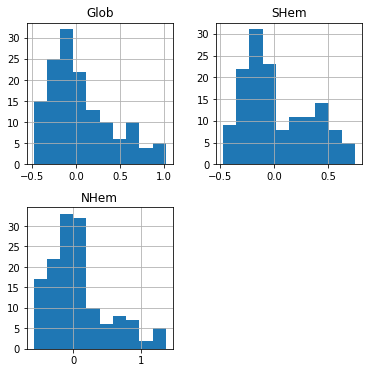

In [105]:
dat[['Glob', 'SHem', 'NHem']].hist();

(pandas-line-plots)=
### Line plots (`pandas`)

The `.plot` method, given a `Series` (or a `DataFrame` with one column), creates a line plot with the indices on the x-axis and the values on the y-axis:

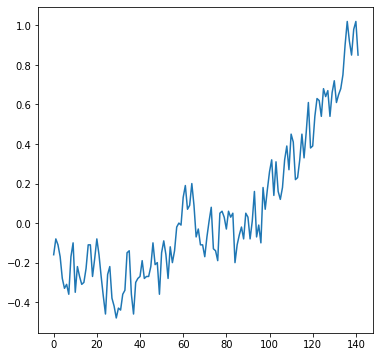

In [106]:
dat['Glob'].plot();

In case we need to change the values on the x-axis, the simplest way is to set the required values as the index (see {ref}`modifying-index`). For example, here we set the `"Year"` column as the `DataFrame` index, then plot the `"Glob"` column. As a result, the measurement *year* appears on the x-axis instead of the default consecutive index:

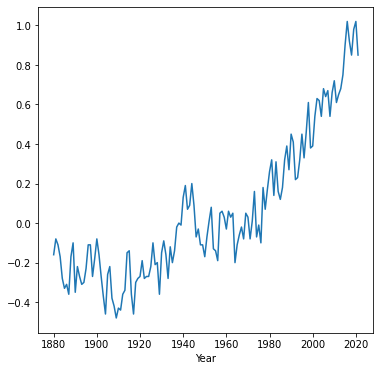

In [107]:
dat.set_index('Year')['Glob'].plot();

Pay attention to the order of operations (from left to right) in the above expression:

* `dat.set_index('Year')`—Setting the index
* `['Glob']`—Extracting a column (as `Series`)
* `.plot();`—Plotting

When we plot a `DataFrame` with more than one column, the columns are plotted as sepatate *series* in the same line plot. This is useful to compare the values in different columns. Fore example, plotting the `"Glob"`, `"NHem"`, and `"SHem"` columns demonstrates that in recent years Northern Hemisphere (`"NHem"`) temperatures have been relatively higher, while Southern Hemisphere (`"SHem"`) temperatures have been relatively lower, compared to the global average (`"Glob"`):

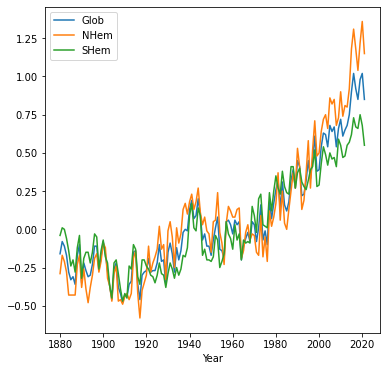

In [108]:
dat.set_index('Year')[['Glob', 'NHem', 'SHem']].plot();

(scatterplots)=
### Scatterplots (`pandas`)

One more useful type of plot is a *scatterplot*, where we display the association between two series in the form of scattered points. To produce a scatterplot, we use the `.plot.scatter` method of a `DataFrame`, specifying the names of the columns to be displayed in the x-axis (`x`) and y-axis (`y`).

For example, the following expression shows the relation between the values in the `'NHem'` and `'SHem'` columns of `dat`:

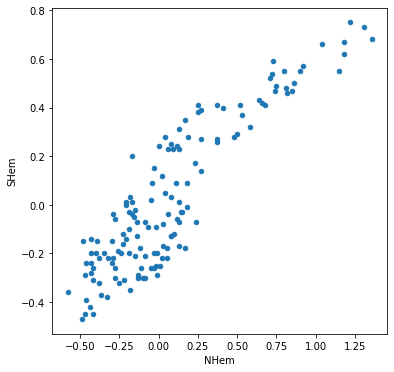

In [109]:
dat.plot.scatter(x='NHem', y='SHem');

We clearly see that there is a strong positive association between Northern Hemisphere and Southern Hemisphere temperatures across years. Namely, in years when the Nothern Hemisphere temperature is high, the Southern Hemisphere temperature also tends to be high, and vice versa.

(pandas-operators)=
## Operators

(operators-on-series)=
### Operators on `Series`

Operators and summary functions can be applied to `Series` objects, similarly to the way they can be applied to `numpy` arrays (see {ref}`numpy-vectorized-ops` and {ref}`summarizing-array-values`, respectively). For example, summary methods such as `.min`, `.max`, and `.mean` can be applied on a `Series` to summarize its respective properties. Here is how we can find out the start and end `"Year"` in `dat`:

In [110]:
dat['Year'].min()

1880

In [111]:
dat['Year'].max()

2021

and the average `"Glob"` value:

In [112]:
dat['Glob'].mean()

0.055633802816901445

We can also combine `Series` with individual values, or combine two series, to apply pairwise arithmetic or boolean operators. For example, here is how we can subtract `1` from all `"Year"` values:

In [113]:
dat['Year'] - 1

0      1879
1      1880
2      1881
3      1882
4      1883
       ... 
137    2016
138    2017
139    2018
140    2019
141    2020
Name: Year, Length: 142, dtype: int64

and here is how we can calculate the yearly differences between the Northern Hemisphere and Southern Hemisphere temperature anomalies:

In [114]:
dat['NHem'] - dat['SHem']

0     -0.25
1     -0.18
2     -0.21
3     -0.22
4     -0.29
       ... 
137    0.51
138    0.38
139    0.47
140    0.68
141    0.60
Length: 142, dtype: float64

Note that this is an arithmetic operation between two `Series`, which returns a new series.

```{note}
When performing operations between pairs of `Series` or `DataFrame`s, `pandas` aligns the elements according to the *index*, rather than the position. When the data come from the same table (such as in the last example), the indices are guaranteed to match. However, when the data come from *different* tables, you must make sure their indices match.
```

### Operators on `DataFrame`s

Operating on an entire `DataFrame` is more complex than operating on a `Series` (see {ref}`operators-on-series`). Accordingly, operators behave in different ways. For example, arithmetic and boolean operations combined with an individual value are applied per-element, resulting in a new `DataFrame` (assuming that all columns are numeric):

In [115]:
dat - 10

Year   Glob   NHem   SHem  24N-90N  ...  EQU-24N  24S-EQU  44S-24S  \
0    1870 -10.16 -10.29 -10.04   -10.37  ...   -10.15   -10.09   -10.03   
1    1871 -10.08 -10.17  -9.99   -10.34  ...    -9.90    -9.88   -10.05   
2    1872 -10.11 -10.21 -10.00   -10.31  ...   -10.05   -10.04    -9.98   
3    1873 -10.17 -10.28 -10.06   -10.35  ...   -10.17   -10.14   -10.03   
4    1874 -10.28 -10.43 -10.14   -10.61  ...   -10.13   -10.15   -10.19   
..    ...    ...    ...    ...      ...  ...      ...      ...      ...   
137  2007  -9.08  -8.82  -9.33    -8.60  ...    -9.13    -9.23    -9.24   
138  2008  -9.15  -8.96  -9.34    -8.75  ...    -9.27    -9.38    -9.21   
139  2009  -9.02  -8.78  -9.25    -8.57  ...    -9.09    -9.11    -9.26   
140  2010  -8.98  -8.64  -9.32    -8.32  ...    -9.11    -9.16    -9.42   
141  2011  -9.15  -8.85  -9.45    -8.57  ...    -9.27    -9.41    -9.29   

     64S-44S  90S-64S  
0      -9.95    -9.35  
1     -10.07    -9.43  
2      -9.96    -9.40  
3      -9.93    -9.52  
4     -10.02    -9.37  
..       ...      ...  
137    -9.65    -9.45  
138    -9.63    -9.04  
139    -9.61    -9.17  
140    -9.61    -9.09  
141    -9.68    -9.67  

[142 rows x 15 columns]

Methods such as `.mean`, however, are by default applied per column (i.e., `axis=0`):

In [116]:
dat.mean()

Year       1950.500000
Glob          0.055634
NHem          0.083169
SHem          0.028803
24N-90N       0.103732
              ...     
EQU-24N       0.054930
24S-EQU       0.079437
44S-24S       0.036127
64S-44S      -0.060704
90S-64S      -0.089507
Length: 15, dtype: float64

We elaborate on this type of row- and column-wise operations later on (see {ref}`pandas-row-col-wise-operations`).

(pandas-creating-new-columns)=
## Creating new columns

New `DataFrame` columns can be created by assignment of a `Series` to a non-existing column index. For example, the following expression calculates a `Series` of yearly differences between the Northern Hemisphere and Southern Hemisphere temperatures, as shown above, and assigns it to a *new* column named `diff`:

In [117]:
dat['diff'] = dat['NHem'] - dat['SHem']
dat

Year  Glob  NHem  SHem  24N-90N  ...  24S-EQU  44S-24S  64S-44S  90S-64S  \
0    1880 -0.16 -0.29 -0.04    -0.37  ...    -0.09    -0.03     0.05     0.65   
1    1881 -0.08 -0.17  0.01    -0.34  ...     0.12    -0.05    -0.07     0.57   
2    1882 -0.11 -0.21  0.00    -0.31  ...    -0.04     0.02     0.04     0.60   
3    1883 -0.17 -0.28 -0.06    -0.35  ...    -0.14    -0.03     0.07     0.48   
4    1884 -0.28 -0.43 -0.14    -0.61  ...    -0.15    -0.19    -0.02     0.63   
..    ...   ...   ...   ...      ...  ...      ...      ...      ...      ...   
137  2017  0.92  1.18  0.67     1.40  ...     0.77     0.76     0.35     0.55   
138  2018  0.85  1.04  0.66     1.25  ...     0.62     0.79     0.37     0.96   
139  2019  0.98  1.22  0.75     1.43  ...     0.89     0.74     0.39     0.83   
140  2020  1.02  1.36  0.68     1.68  ...     0.84     0.58     0.39     0.91   
141  2021  0.85  1.15  0.55     1.43  ...     0.59     0.71     0.32     0.33   

     diff  
0   -0.25  
1   -0.18  
2   -0.21  
3   -0.22  
4   -0.29  
..    ...  
137  0.51  
138  0.38  
139  0.47  
140  0.68  
141  0.60  

[142 rows x 16 columns]

Here is a plot ({ref}`pandas-line-plots`) of the differences we just calulated, as function of time:

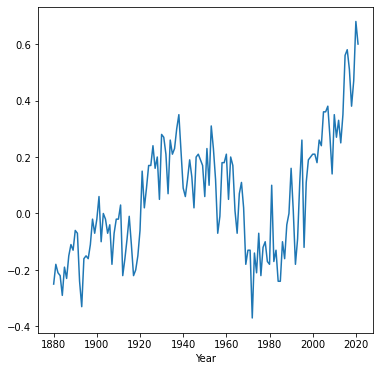

In [118]:
dat.set_index('Year')['diff'].plot();

We can also assign an expression that combines series with individual values:

In [119]:
dat['NHem2'] = dat['NHem'] * 2
dat

Year  Glob  NHem  SHem  24N-90N  ...  44S-24S  64S-44S  90S-64S  diff  \
0    1880 -0.16 -0.29 -0.04    -0.37  ...    -0.03     0.05     0.65 -0.25   
1    1881 -0.08 -0.17  0.01    -0.34  ...    -0.05    -0.07     0.57 -0.18   
2    1882 -0.11 -0.21  0.00    -0.31  ...     0.02     0.04     0.60 -0.21   
3    1883 -0.17 -0.28 -0.06    -0.35  ...    -0.03     0.07     0.48 -0.22   
4    1884 -0.28 -0.43 -0.14    -0.61  ...    -0.19    -0.02     0.63 -0.29   
..    ...   ...   ...   ...      ...  ...      ...      ...      ...   ...   
137  2017  0.92  1.18  0.67     1.40  ...     0.76     0.35     0.55  0.51   
138  2018  0.85  1.04  0.66     1.25  ...     0.79     0.37     0.96  0.38   
139  2019  0.98  1.22  0.75     1.43  ...     0.74     0.39     0.83  0.47   
140  2020  1.02  1.36  0.68     1.68  ...     0.58     0.39     0.91  0.68   
141  2021  0.85  1.15  0.55     1.43  ...     0.71     0.32     0.33  0.60   

     NHem2  
0    -0.58  
1    -0.34  
2    -0.42  
3    -0.56  
4    -0.86  
..     ...  
137   2.36  
138   2.08  
139   2.44  
140   2.72  
141   2.30  

[142 rows x 17 columns]

or an individual value on its own (in which case it is duplicated across all rows):

In [120]:
dat['variable'] = 'temperature'
dat

Year  Glob  NHem  SHem  24N-90N  ...  64S-44S  90S-64S  diff  NHem2  \
0    1880 -0.16 -0.29 -0.04    -0.37  ...     0.05     0.65 -0.25  -0.58   
1    1881 -0.08 -0.17  0.01    -0.34  ...    -0.07     0.57 -0.18  -0.34   
2    1882 -0.11 -0.21  0.00    -0.31  ...     0.04     0.60 -0.21  -0.42   
3    1883 -0.17 -0.28 -0.06    -0.35  ...     0.07     0.48 -0.22  -0.56   
4    1884 -0.28 -0.43 -0.14    -0.61  ...    -0.02     0.63 -0.29  -0.86   
..    ...   ...   ...   ...      ...  ...      ...      ...   ...    ...   
137  2017  0.92  1.18  0.67     1.40  ...     0.35     0.55  0.51   2.36   
138  2018  0.85  1.04  0.66     1.25  ...     0.37     0.96  0.38   2.08   
139  2019  0.98  1.22  0.75     1.43  ...     0.39     0.83  0.47   2.44   
140  2020  1.02  1.36  0.68     1.68  ...     0.39     0.91  0.68   2.72   
141  2021  0.85  1.15  0.55     1.43  ...     0.32     0.33  0.60   2.30   

        variable  
0    temperature  
1    temperature  
2    temperature  
3    temperature  
4    temperature  
..           ...  
137  temperature  
138  temperature  
139  temperature  
140  temperature  
141  temperature  

[142 rows x 18 columns]

Let us delete the `'diff'`, `'NHem2'`, `'variable'` columns we just created to get the original version of `dat`:

In [121]:
dat = dat.drop(['diff', 'NHem2', 'variable'], axis=1)
dat

Year  Glob  NHem  SHem  24N-90N  ...  EQU-24N  24S-EQU  44S-24S  64S-44S  \
0    1880 -0.16 -0.29 -0.04    -0.37  ...    -0.15    -0.09    -0.03     0.05   
1    1881 -0.08 -0.17  0.01    -0.34  ...     0.10     0.12    -0.05    -0.07   
2    1882 -0.11 -0.21  0.00    -0.31  ...    -0.05    -0.04     0.02     0.04   
3    1883 -0.17 -0.28 -0.06    -0.35  ...    -0.17    -0.14    -0.03     0.07   
4    1884 -0.28 -0.43 -0.14    -0.61  ...    -0.13    -0.15    -0.19    -0.02   
..    ...   ...   ...   ...      ...  ...      ...      ...      ...      ...   
137  2017  0.92  1.18  0.67     1.40  ...     0.87     0.77     0.76     0.35   
138  2018  0.85  1.04  0.66     1.25  ...     0.73     0.62     0.79     0.37   
139  2019  0.98  1.22  0.75     1.43  ...     0.91     0.89     0.74     0.39   
140  2020  1.02  1.36  0.68     1.68  ...     0.89     0.84     0.58     0.39   
141  2021  0.85  1.15  0.55     1.43  ...     0.73     0.59     0.71     0.32   

     90S-64S  
0       0.65  
1       0.57  
2       0.60  
3       0.48  
4       0.63  
..       ...  
137     0.55  
138     0.96  
139     0.83  
140     0.91  
141     0.33  

[142 rows x 15 columns]

(dataframe-filtering)=
## `DataFrame` filtering

(pandas-filtering-conditinal)=
### Using conditional operators

Most often, instead of selecting rows by index or by position (see {ref}`dataframe-selecting-rows`), we want to *filter* rows by a condition that we apply on table values. For example, suppose that we want to get a subset of `dat` with all rows after the year `2017`. To do that, we can create a boolean `Series`, specifying which rows are to be retained:

In [146]:
sel = dat['Year'] > 2017
sel

0      False
1      False
2      False
3      False
4      False
       ...  
137    False
138     True
139     True
140     True
141     True
Name: Year, Length: 142, dtype: bool

Then, the boolean series can be passed as an *index* inside square brackets (`[`), to select those rows corresponding to `True`:

In [147]:
dat[sel]

Year  Glob  NHem  SHem  24N-90N  ...  EQU-24N  24S-EQU  44S-24S  64S-44S  \
138  2018  0.85  1.04  0.66     1.25  ...     0.73     0.62     0.79     0.37   
139  2019  0.98  1.22  0.75     1.43  ...     0.91     0.89     0.74     0.39   
140  2020  1.02  1.36  0.68     1.68  ...     0.89     0.84     0.58     0.39   
141  2021  0.85  1.15  0.55     1.43  ...     0.73     0.59     0.71     0.32   

     90S-64S  
138     0.96  
139     0.83  
140     0.91  
141     0.33  

[4 rows x 15 columns]

The same can be acheived in a single step, *without* storing the `Series` in a variable such as `sel`, as follows:

In [122]:
dat[dat['Year'] > 2017]

Year  Glob  NHem  SHem  24N-90N  ...  EQU-24N  24S-EQU  44S-24S  64S-44S  \
138  2018  0.85  1.04  0.66     1.25  ...     0.73     0.62     0.79     0.37   
139  2019  0.98  1.22  0.75     1.43  ...     0.91     0.89     0.74     0.39   
140  2020  1.02  1.36  0.68     1.68  ...     0.89     0.84     0.58     0.39   
141  2021  0.85  1.15  0.55     1.43  ...     0.73     0.59     0.71     0.32   

     90S-64S  
138     0.96  
139     0.83  
140     0.91  
141     0.33  

[4 rows x 15 columns]

```{admonition} Exercise 05-e
:class: important
* Create a subset of `dat` with all rows where the global temperature anomaly (`'Glob'`) was above `1` degree.
```

(pandas-using-isin)=
### Using `.isin`

Sometimes, the condition we are interested in is not a comparison against an individual value (such as `>2017`, see {ref}`pandas-filtering-conditinal`), but multiple values. For example, suppose we want to extract the rows corresponding to the years `2008`, `2012`, and `2016`, in `dat`. One way is to compose a combined condition using `|`, using the `numpy` syntax we are familiar with (see {ref}`numpy-conditional-operators`). Again, recall that we must enclose each internal expression in breackets `(` so that it is evaluated before `|`:

In [123]:
sel = (dat['Year'] == 2008) | (dat['Year'] == 2012) | (dat['Year'] == 2016)
dat[sel]

Year  Glob  NHem  SHem  24N-90N  ...  EQU-24N  24S-EQU  44S-24S  64S-44S  \
128  2008  0.54  0.68  0.41     0.92  ...     0.34     0.42     0.52     0.09   
132  2012  0.65  0.81  0.48     1.04  ...     0.48     0.57     0.56     0.19   
136  2016  1.02  1.31  0.73     1.55  ...     0.96     1.06     0.67     0.25   

     90S-64S  
128     0.62  
132     0.41  
136     0.41  

[3 rows x 15 columns]

As you can imagine, this method quickly becomes unfeasible if the number of items becomes large. Instead, we can use the `.isin` method, combined with a `list` of items to compare with the `Series` values:

In [150]:
sel = dat['Year'].isin([2008, 2012, 2016])
dat[sel]

Year  Glob  NHem  SHem  24N-90N  ...  EQU-24N  24S-EQU  44S-24S  64S-44S  \
128  2008  0.54  0.68  0.41     0.92  ...     0.34     0.42     0.52     0.09   
132  2012  0.65  0.81  0.48     1.04  ...     0.48     0.57     0.56     0.19   
136  2016  1.02  1.31  0.73     1.55  ...     0.96     1.06     0.67     0.25   

     90S-64S  
128     0.62  
132     0.41  
136     0.41  

[3 rows x 15 columns]

Recall the `in` operator which we learned about earlier (see {ref}`the-in-operator`). The `in` operator is analogous to the `.isin` method, but intended for lists.

```{admonition} Exercise 05-f
:class: important
* What do you think is the meaning of `dat[~sel]`? Try it to check your answer.
```

### Assignment to subsets

When assigning to subsets of a column, we need to use the `.loc` method. Typically we combine:

* A boolean `Series` in the *rows* index, to select the observations we want to modify
* A single `string` in the *columns* index, to select the variable we want to modify

For example, the following expression sets the `'NHem'` column value to `12.3` in all years after 2017:

In [151]:
dat.loc[dat['Year'] > 2017, 'NHem'] = 999
dat

Year  Glob    NHem  SHem  24N-90N  ...  EQU-24N  24S-EQU  44S-24S  \
0    1880 -0.16   -0.29 -0.04    -0.37  ...    -0.15    -0.09    -0.03   
1    1881 -0.08   -0.17  0.01    -0.34  ...     0.10     0.12    -0.05   
2    1882 -0.11   -0.21  0.00    -0.31  ...    -0.05    -0.04     0.02   
3    1883 -0.17   -0.28 -0.06    -0.35  ...    -0.17    -0.14    -0.03   
4    1884 -0.28   -0.43 -0.14    -0.61  ...    -0.13    -0.15    -0.19   
..    ...   ...     ...   ...      ...  ...      ...      ...      ...   
137  2017  0.92    1.18  0.67     1.40  ...     0.87     0.77     0.76   
138  2018  0.85  999.00  0.66     1.25  ...     0.73     0.62     0.79   
139  2019  0.98  999.00  0.75     1.43  ...     0.91     0.89     0.74   
140  2020  1.02  999.00  0.68     1.68  ...     0.89     0.84     0.58   
141  2021  0.85  999.00  0.55     1.43  ...     0.73     0.59     0.71   

     64S-44S  90S-64S  
0       0.05     0.65  
1      -0.07     0.57  
2       0.04     0.60  
3       0.07     0.48  
4      -0.02     0.63  
..       ...      ...  
137     0.35     0.55  
138     0.37     0.96  
139     0.39     0.83  
140     0.39     0.91  
141     0.32     0.33  

[142 rows x 15 columns]

To get back to the original values, let us read the CSV file once again:

In [152]:
dat = pd.read_csv('data/ZonAnn.Ts+dSST.csv')
dat

Year  Glob  NHem  SHem  24N-90N  ...  EQU-24N  24S-EQU  44S-24S  64S-44S  \
0    1880 -0.16 -0.29 -0.04    -0.37  ...    -0.15    -0.09    -0.03     0.05   
1    1881 -0.08 -0.17  0.01    -0.34  ...     0.10     0.12    -0.05    -0.07   
2    1882 -0.11 -0.21  0.00    -0.31  ...    -0.05    -0.04     0.02     0.04   
3    1883 -0.17 -0.28 -0.06    -0.35  ...    -0.17    -0.14    -0.03     0.07   
4    1884 -0.28 -0.43 -0.14    -0.61  ...    -0.13    -0.15    -0.19    -0.02   
..    ...   ...   ...   ...      ...  ...      ...      ...      ...      ...   
137  2017  0.92  1.18  0.67     1.40  ...     0.87     0.77     0.76     0.35   
138  2018  0.85  1.04  0.66     1.25  ...     0.73     0.62     0.79     0.37   
139  2019  0.98  1.22  0.75     1.43  ...     0.91     0.89     0.74     0.39   
140  2020  1.02  1.36  0.68     1.68  ...     0.89     0.84     0.58     0.39   
141  2021  0.85  1.15  0.55     1.43  ...     0.73     0.59     0.71     0.32   

     90S-64S  
0       0.65  
1       0.57  
2       0.60  
3       0.48  
4       0.63  
..       ...  
137     0.55  
138     0.96  
139     0.83  
140     0.91  
141     0.33  

[142 rows x 15 columns]

(pandas-missing-data)=
## Working with missing data (`pandas`)

### Missing data in `pandas`

Missing values, denoting that the true value is unknown, are an inevitable feature of real-world data. In plain-text formats, such as CSV, missing values are commonly just "missing", i.e., left blank, or marked with a labels such as the text `"NA"`. 

Treatment of "No Data" values in `Series` and `DataFrame`s is derived from the underlying behavior in `numpy` ({ref}`numpy-nodata`), as `pandas` is based on `numpy`. Namely, "No Data" values are typically represented using `np.nan`.

`pandas` may automatically transform the `Series` data type, and "No Data" representation, for optimized data storage. For example, a `Series` of type `int` which contains one or more `np.nan` value, is automatically transformed to `float`, similarly to the behaviour we have seen with `numpy` array ({ref}`numpy-nodata`):

In [153]:
pd.Series([7, 4, 3])

0    7
1    4
2    3
dtype: int64

In [154]:
pd.Series([7, np.nan, 3])

0    7.0
1    NaN
2    3.0
dtype: float64

Moreover, `None` values are automatically transformed to `np.nan` (unlike `numpy`, where `None` values are preserved, resulting in an `object` array):

In [155]:
pd.Series([7, None, 3])

0    7.0
1    NaN
2    3.0
dtype: float64

"No Data" values are automatically assigned where necessary when creating a `Series` or a `DataFrame` through other methods too. For example, empty cells in a CSV file are assigned with `np.nan` when importing the CSV into a `DataFrame` (see {ref}`pandas-reading-from-file`). 

The `students.csv` file contains annual students counts in universities of Israel during the period 1969-2020: 

* The first column (`"year"`) specifies the academic year
* All other columns (`Ariel University"`, `"Weizmann Institute of Science"`, etc.) represent the different universities and their student counts

If you open the CSV file in a spreadsheet program (such as Excel), you will see that some of the cells are empty. Those cells are assigned with `np.nan` when importing the table:

In [124]:
students = pd.read_csv('data/students.csv')
students

year  Ariel University  Weizmann Institute of Science  \
0   1969/70               NaN                          419.0   
1   1974/75               NaN                          580.0   
2   1979/80               NaN                          490.0   
3   1980/81               NaN                            NaN   
4   1981/82               NaN                            NaN   
..      ...               ...                            ...   
38  2015/16           10977.0                         1104.0   
39  2016/17               NaN                            NaN   
40  2017/18           11899.0                            NaN   
41  2018/19           11741.0                         1148.0   
42  2019/20           12016.0                         1215.0   

    Ben-Gurion Univ. of the Negev  Haifa University  Bar-Ilan University  \
0                            1297              2794                 4273   
1                            3247              4713                 6527   
2                            4250              6140                 8070   
3                            4430              6040                 8670   
4                            4500              6055                 8730   
..                            ...               ...                  ...   
38                          17918             18027                20621   
39                          17797             18047                18830   
40                          17724             17471                17523   
41                          17699             17570                17340   
42                          17820             17396                17764   

    Tel-Aviv University  Technion  Hebrew University  
0                  7958      6045              12588  
1                 12813      8453              13516  
2                 14380      7580              13570  
3                 14860      7620              13770  
4                 15770      7650              14000  
..                  ...       ...                ...  
38                26643     14240              20171  
39                26342     14501              19784  
40                26023     14054              19582  
41                26361     13611              19837  
42                26570     13787              20898  

[43 rows x 9 columns]

For example, the first value in the `"Ariel University"` column is missing:

In [125]:
students['Ariel University'].iloc[0]

nan

### Detecting with `pd.isna`

To detect "No Data" values, the `.isna` method (or `pd.isna` function) can be applied on a `Series` or a `DataFrame`. The result is a boolean mask that marks the missing values. The `pd.isna` function from `pandas` is analogous to the `np.isnan` function for arrays, which we learned about earlier (see {ref}`numpy-detecting-nodata`).

For example, `students.isna()` returns a boolean `DataFrame`, of the same shape as `students`, with `True` marking "No Data" values:

In [126]:
students.isna()

year  Ariel University  Weizmann Institute of Science  \
0   False              True                          False   
1   False              True                          False   
2   False              True                          False   
3   False              True                           True   
4   False              True                           True   
..    ...               ...                            ...   
38  False             False                          False   
39  False              True                           True   
40  False             False                           True   
41  False             False                          False   
42  False             False                          False   

    Ben-Gurion Univ. of the Negev  Haifa University  Bar-Ilan University  \
0                           False             False                False   
1                           False             False                False   
2                           False             False                False   
3                           False             False                False   
4                           False             False                False   
..                            ...               ...                  ...   
38                          False             False                False   
39                          False             False                False   
40                          False             False                False   
41                          False             False                False   
42                          False             False                False   

    Tel-Aviv University  Technion  Hebrew University  
0                 False     False              False  
1                 False     False              False  
2                 False     False              False  
3                 False     False              False  
4                 False     False              False  
..                  ...       ...                ...  
38                False     False              False  
39                False     False              False  
40                False     False              False  
41                False     False              False  
42                False     False              False  

[43 rows x 9 columns]

Similarly, the `.isna()` method applied on a `Series` returns a new boolean `Series` where "No Data" values are marked with `True`:

In [128]:
students['Ariel University'].isna()

0      True
1      True
2      True
3      True
4      True
      ...  
38    False
39     True
40    False
41    False
42    False
Name: Ariel University, Length: 43, dtype: bool

The `~` operator (see {ref}`numpy-conditional-operators`) reverses a boolean `Series`. This is very useful in the context of "No Data" masks, since it can reverse the mask so that it points at *non*-missing values.

For example, here is how we can get the reverse of `students.isna()`:

In [160]:
~students.isna()

year  Ariel University  Weizmann Institute of Science  \
0   True             False                           True   
1   True             False                           True   
2   True             False                           True   
3   True             False                          False   
4   True             False                          False   
..   ...               ...                            ...   
38  True              True                           True   
39  True             False                          False   
40  True              True                          False   
41  True              True                           True   
42  True              True                           True   

    Ben-Gurion Univ. of the Negev  Haifa University  Bar-Ilan University  \
0                            True              True                 True   
1                            True              True                 True   
2                            True              True                 True   
3                            True              True                 True   
4                            True              True                 True   
..                            ...               ...                  ...   
38                           True              True                 True   
39                           True              True                 True   
40                           True              True                 True   
41                           True              True                 True   
42                           True              True                 True   

    Tel-Aviv University  Technion  Hebrew University  
0                  True      True               True  
1                  True      True               True  
2                  True      True               True  
3                  True      True               True  
4                  True      True               True  
..                  ...       ...                ...  
38                 True      True               True  
39                 True      True               True  
40                 True      True               True  
41                 True      True               True  
42                 True      True               True  

[43 rows x 9 columns]

and here is how we can get the reverse of `students['Ariel University'].isna()`:

In [161]:
~students['Ariel University'].isna()

0     False
1     False
2     False
3     False
4     False
      ...  
38     True
39    False
40     True
41     True
42     True
Name: Ariel University, Length: 43, dtype: bool

Another possible use of `~` and `.isna` is to extract the non-missing values from a series. Here is an example:

In [162]:
students['Ariel University'][~students['Ariel University'].isna()]

38    10977.0
40    11899.0
41    11741.0
42    12016.0
Name: Ariel University, dtype: float64

However, there is a dedicated method called `.dropna` to do that with shorter code (see {ref}`removing-with-dropna`):

In [163]:
students['Ariel University'].dropna()

38    10977.0
40    11899.0
41    11741.0
42    12016.0
Name: Ariel University, dtype: float64

Similarly, we can extract `DataFrame` rows where a particular column is non-missing. For example, here we have those `students` rows that have a valid `'Ariel University'` student count:

In [164]:
students[~students['Ariel University'].isna()]

year  Ariel University  Weizmann Institute of Science  \
38  2015/16           10977.0                         1104.0   
40  2017/18           11899.0                            NaN   
41  2018/19           11741.0                         1148.0   
42  2019/20           12016.0                         1215.0   

    Ben-Gurion Univ. of the Negev  Haifa University  Bar-Ilan University  \
38                          17918             18027                20621   
40                          17724             17471                17523   
41                          17699             17570                17340   
42                          17820             17396                17764   

    Tel-Aviv University  Technion  Hebrew University  
38                26643     14240              20171  
40                26023     14054              19582  
41                26361     13611              19837  
42                26570     13787              20898

```{note} 
Instead of reversing the output of `pd.isna` with the `~operator`, another option is to use the inverse method `.notna`, which returns the *non-missing* mask.
```

Finally, it is often useful to combine the `.isna` method with `.any` to find out if a `Series` contains at least one missing value:

In [165]:
students['Ariel University'].isna().any()

True

In [166]:
students['Ben-Gurion Univ. of the Negev'].isna().any()

False

or to find out which columns contain at least one missing value:

In [167]:
students.isna().any()

year                             False
Ariel University                  True
Weizmann Institute of Science     True
Ben-Gurion Univ. of the Negev    False
Haifa University                 False
Bar-Ilan University              False
Tel-Aviv University              False
Technion                         False
Hebrew University                False
dtype: bool

We can also use `.sum` to find out how many missing value are there in each column:

In [168]:
students.isna().sum()

year                              0
Ariel University                 39
Weizmann Institute of Science     6
Ben-Gurion Univ. of the Negev     0
Haifa University                  0
Bar-Ilan University               0
Tel-Aviv University               0
Technion                          0
Hebrew University                 0
dtype: int64

(pandas-operations-with-missing-data)=
### Operators with missing values

When applying a method such as `.sum`, `.mean`, `.min`, or `.max` (or the respective `np.*` function) on a `Series`, the "No Data" values are ignored. That is, the result is based only on the non-missing values. For example:

In [169]:
students['Ariel University'].sum()

46633.0

Note that this behavior is specific to `pandas`, and unlike what we have seen with `numpy` arrays, where these opertions return "No Data" if at least one of the values in the array is "No Data" (see {ref}`numpy-operations-with-nodata`):

In [130]:
students['Ariel University'].to_numpy().sum()

nan

Element-by-element operations, however, expectedly result in "No Data" when applied to "No Data" elements, since the result cannot be computed at all. For example:

In [131]:
students['Ariel University'] / 1000

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
       ...  
38    10.977
39       NaN
40    11.899
41    11.741
42    12.016
Name: Ariel University, Length: 43, dtype: float64

(removing-with-dropna)=
### Removing with `.dropna`

The `.dropna` method can be used to remove missing values from a `DataFrame` (or a `Series`). The default is to drop all rows that have at least one missing value, i.e., keeping only *complete observations*. For example:

In [ ]:
students.dropna()

year  Ariel University  Weizmann Institute of Science  \
38  2015/16           10977.0                         1104.0   
41  2018/19           11741.0                         1148.0   
42  2019/20           12016.0                         1215.0   

    Ben-Gurion Univ. of the Negev  Haifa University  Bar-Ilan University  \
38                          17918             18027                20621   
41                          17699             17570                17340   
42                          17820             17396                17764   

    Tel-Aviv University  Technion  Hebrew University  
38                26643     14240              20171  
41                26361     13611              19837  
42                26570     13787              20898

```{note}
There are other parameters of `.dropna` for dropping columns instead of rows, or dropping rows or column using a threshold of "acceptable" minimum number of non-missing values. See the documentation for details: <https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html>.
```

### Replacing with `.fillna`

Missing values can be replaced using the `.fillna` method. The parameter specifies which new value should be placed instead of the "No Data" values. For example, here is how we can replace the "No Data" values in the `"Ariel University"` student counts column with `0`:

In [136]:
students['Ariel University'].fillna(0)

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
       ...   
38    10977.0
39        0.0
40    11899.0
41    11741.0
42    12016.0
Name: Ariel University, Length: 43, dtype: float64

or assign the result back to the `students` table:

In [137]:
students['Ariel University'] = students['Ariel University'].fillna(0)
students

year  Ariel University  Weizmann Institute of Science  \
0   1969/70               0.0                          419.0   
1   1974/75               0.0                          580.0   
2   1979/80               0.0                          490.0   
3   1980/81               0.0                            NaN   
4   1981/82               0.0                            NaN   
..      ...               ...                            ...   
38  2015/16           10977.0                         1104.0   
39  2016/17               0.0                            NaN   
40  2017/18           11899.0                            NaN   
41  2018/19           11741.0                         1148.0   
42  2019/20           12016.0                         1215.0   

    Ben-Gurion Univ. of the Negev  Haifa University  Bar-Ilan University  \
0                            1297              2794                 4273   
1                            3247              4713                 6527   
2                            4250              6140                 8070   
3                            4430              6040                 8670   
4                            4500              6055                 8730   
..                            ...               ...                  ...   
38                          17918             18027                20621   
39                          17797             18047                18830   
40                          17724             17471                17523   
41                          17699             17570                17340   
42                          17820             17396                17764   

    Tel-Aviv University  Technion  Hebrew University  
0                  7958      6045              12588  
1                 12813      8453              13516  
2                 14380      7580              13570  
3                 14860      7620              13770  
4                 15770      7650              14000  
..                  ...       ...                ...  
38                26643     14240              20171  
39                26342     14501              19784  
40                26023     14054              19582  
41                26361     13611              19837  
42                26570     13787              20898  

[43 rows x 9 columns]

Let us return to the original `students` table by converting the cells back to "No Data":

In [114]:
students.loc[students['Ariel University'] == 0, 'Ariel University'] = np.nan
students

year  Ariel University  Weizmann Institute of Science  \
0   1969/70               NaN                          419.0   
1   1974/75               NaN                          580.0   
2   1979/80               NaN                          490.0   
3   1980/81               NaN                            NaN   
4   1981/82               NaN                            NaN   
..      ...               ...                            ...   
38  2015/16           10977.0                         1104.0   
39  2016/17               NaN                            NaN   
40  2017/18           11899.0                            NaN   
41  2018/19           11741.0                         1148.0   
42  2019/20           12016.0                         1215.0   

    Ben-Gurion Univ. of the Negev  Haifa University  Bar-Ilan University  \
0                            1297              2794                 4273   
1                            3247              4713                 6527   
2                            4250              6140                 8070   
3                            4430              6040                 8670   
4                            4500              6055                 8730   
..                            ...               ...                  ...   
38                          17918             18027                20621   
39                          17797             18047                18830   
40                          17724             17471                17523   
41                          17699             17570                17340   
42                          17820             17396                17764   

    Tel-Aviv University  Technion  Hebrew University  
0                  7958      6045              12588  
1                 12813      8453              13516  
2                 14380      7580              13570  
3                 14860      7620              13770  
4                 15770      7650              14000  
..                  ...       ...                ...  
38                26643     14240              20171  
39                26342     14501              19784  
40                26023     14054              19582  
41                26361     13611              19837  
42                26570     13787              20898  

[43 rows x 9 columns]

## Copies

One more thing we need to be aware when working with `pandas` is the distinction between references and copies. The `pandas` package (and `geopandas` which extends it, see {ref}`geopandas1`) behaves similarly to `numpy` with respect to copies (see {ref}`numpy-references-and-copies`). We must be aware of whether we are creating a view or a copy of a `DataFrame`, to avoid unexpected results.

Here is a small demonstration, very similar to the one we did with `numpy` arrays (see {ref}`numpy-references-and-copies`). Suppose that we create a copy of `dat`, named `dat2`:

In [96]:
dat2 = dat

Next, we modify `dat2`, assigning a new value such as `9999` into a particular cell (e.g., 2<sup>nd</sup> row, 2<sup>nd</sup> column):

In [97]:
dat2.iloc[1, 1] = 9999

The printout of the table top-left "corner" demonstrates the value was actually changed:

In [98]:
dat2.iloc[:4, :4]

Year     Glob  NHem  SHem
0  1880    -0.16 -0.29 -0.04
1  1881  9999.00 -0.17  0.01
2  1882    -0.11 -0.21  0.00
3  1883    -0.17 -0.28 -0.06

What may be surprising, again, is that the original table `dat` has also changed. We thus demonstrated that `dat2` is a reference to `dat`, rather than an independent copy: 

In [99]:
dat.iloc[:4, :4]

Year     Glob  NHem  SHem
0  1880    -0.16 -0.29 -0.04
1  1881  9999.00 -0.17  0.01
2  1882    -0.11 -0.21  0.00
3  1883    -0.17 -0.28 -0.06

To create an independent copy, so that its modifications are not reflected in the original, we need to explicitly use the `.copy` method, as in:

In [ ]:
dat2 = dat.copy()

Let us read the CSV file again to get back to the original values:

In [ ]:
dat = pd.read_csv('data/ZonAnn.Ts+dSST.csv')

(pandas-writing)=
## Writing to file

A `DataFrame` can be exported to several formats, such as CSV, using the appropriate method. For example, exporting to CSV is done using the `.to_csv` method.

Here is how we can export the `DataFrame` named `stations`, which we created in the beginning of the chapter (see {ref}`creating-dataframe`), to a CSV file named `stations.csv` in the `output` directory. The additional `index=False` argument specifies that we do not want to export the index values, which is usually the case:

In [ ]:
stations.to_csv('output/stations.csv', index=False)

Note that the file is exported to a sub-directory named `output` (which must already exist!).

The way the resulting file `stations.csv` is displayed in a spreadsheet program, such as Microsoft Excel or LibreOffice Calc, is shown in {numref}`exported-csv`. 

```{figure} images/exported_csv.png
---
name: exported-csv
---
The `DataFrame` named `stations` when exported to CSV file and opened in LibreOffice Calc 
```

(exercise-pandas1)=
## More exercises

```{admonition} Exercise 05-g
:class: important
* Import the file `students.csv` into a `DataFrame`. 
* Calculate the total number of students in `"Ben-Gurion Univ. of the Negev"` across all years. (answer: `543615`)
* Calculate the total number of students enrolled in `"Ariel University"` across all years. (answer: `46633.0`)
* Use the expression given below to transform the `"year"` column to a numeric column specifying the year when the term ends (e.g., `"2003/04"` becomes `2004`). 
* What is the range of observed years? Place the result into a `list`, and print it. (answer: `[1970,2020]`)
* In what year was the highest number of students in `"Ben-Gurion Univ. of the Negev"`? (answer: `2011`)
* In what year was the highest number of students in the `"Weizmann Institute of Science"`? (answer: `2020`)

```py
students["year"] = pd.to_numeric(students["year"].str.split("/").str[0]) + 1
```

```{admonition} Exercise 05-h
:class: important
* Read the file `kinneret_level.csv` to a `DataFrame` object named `kinneret`. The file contains daily measurements of the water level in Lake Kinneret. Note that water level was not measured on all days. Days with no measurements were not recorded in the file.
* Rename the columns to `'date'` and `'value'`, which are easier to work with.
* Use the code given below to fill "missing" days with `np.nan`, so that the time-series is complete. Note that now the table has one column named `value`, while the (now consecutive) dates are stored in a special index of type `DatetimeIndex` (see <https://stackoverflow.com/questions/19324453/add-missing-dates-to-pandas-dataframe#answer-19324591>).
* Plot the water level time series.
* Calculate the proportion of days without a water level measurement (answer: `0.5348905538416336`).
* What was the *lowest* water level observed? On which day(s) was it observed? Hint: compare the minimum value with the entire series, then use the resulting boolean `Series` to filter table rows.
* What was the longest consecutive period without a measurement? Hint: use a loop that goes over the table rows, and increment a counter variable whenever the current water level is "No Data"; when the current value *isn't* "No Data", (1) reset the counter variable, and (2) keep the current record if it's highest, or else replace the current record (answer: `245`). 

```py
kinneret['date'] = pd.to_datetime(kinneret['date'])
dates = pd.date_range(kinneret['date'].min(), kinneret['date'].max())
kinneret = kinneret.set_index('date')
kinneret = kinneret.reindex(dates, fill_value = np.nan)
```

```{glue:figure} exercise-05-h
---
name: exercise-05-h
---
Kinneret water level time series, from the solution of exercise-05-h
```